# Data Cleaning EDA IV

Final we are going to work with the weekly top 100 ranking of the ATP world tour.

1. How long has Roger Federer been in the top 5?<br>
2. Which player(s) has/have been in the top 100 the last 15 years consequently every week?<br>
3. How has Stefanos Tsitsipas progressed in the last 3 years?<br>
3. Who's the youngest player ever to reach the top 10?<br>
5. BONUS: For how long has Roger Federer been in the top 5 consequently every week?<br>


In [4]:
# lets import our libraries as usually   
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [5]:
# First we have to load our dataset and take a look
rankings_df = pd.read_csv('Datasets/atp-rankings.csv.zip', sep=",", encoding='utf8', low_memory=False)
rankings_df.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
0,1,SRB,Novak Djokovic,34.0,"8,660",13,0,0,2022-05-16
1,2,RUS,Daniil Medvedev,26.0,"7,980",21,0,0,2022-05-16
2,3,GER,Alexander Zverev,25.0,"7,200",22,125,0,2022-05-16
3,4,GRE,Stefanos Tsitsipas,23.0,"6,170",25,250,45,2022-05-16
4,5,ESP,Rafael Nadal,35.0,"5,525",10,0,0,2022-05-16


In [6]:
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ranking          406966 non-null  object 
 1   country          406966 non-null  object 
 2   player           406966 non-null  object 
 3   age              406612 non-null  float64
 4   points           406966 non-null  object 
 5   tournaments      406966 non-null  int64  
 6   points_dropping  406966 non-null  object 
 7   next_best        406966 non-null  int64  
 8   date             406966 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 27.9+ MB


# Preprocess
As we can see we need to preprocess the dataset before we start our exercise, for example some data types arent correct

In [7]:
#Remove letters in ranking (e.g. 1876T for players with tied points)
rankings_df["ranking"] = rankings_df["ranking"].replace('T', '', regex=True)
rankings_df["points"] = rankings_df["points"].replace(',', '', regex=True)
rankings_df["points_dropping"] = rankings_df["points_dropping"].replace(',', '', regex=True)

In [8]:
rankings_df["ranking"] = pd.to_numeric(rankings_df["ranking"])
rankings_df["points"] = pd.to_numeric(rankings_df["points"])
rankings_df["points_dropping"] = pd.to_numeric(rankings_df["points_dropping"])

rankings_df['date'] = pd.to_datetime(rankings_df['date'])

rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406966 entries, 0 to 406965
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ranking          406966 non-null  int64         
 1   country          406966 non-null  object        
 2   player           406966 non-null  object        
 3   age              406612 non-null  float64       
 4   points           406966 non-null  int64         
 5   tournaments      406966 non-null  int64         
 6   points_dropping  406966 non-null  int64         
 7   next_best        406966 non-null  int64         
 8   date             406966 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 27.9+ MB


Now our dataset is ready to go!

# 1. How long has Roger Federer been in the top 5?

In [11]:
# we create a new dataset which contain information only for federer
roger = rankings_df[rankings_df["player"].str.contains("Federer")]
roger.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date
45,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-16
245,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-09
440,41,SUI,Roger Federer,40.0,1120,6,90,0,2022-05-02
640,41,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-25
841,42,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-18


In [12]:
#Check how many weeks he has been in the top 5
rogertop5 = roger[roger["ranking"] <= 5]

print("Roger Federer has been in the top 5 for {} weeks in his career.".format(len(rogertop5)))

Roger Federer has been in the top 5 for 809 weeks in his career.


# 2. Which player(s) has/have been in the top 100 the last 15 years?

In [13]:
# we need to create a new column and colulate the difference from now and going back 15 years
time = datetime.now()
rankings_df['time_difference'] = pd.to_timedelta(time - rankings_df['date'])
rankings_df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16,98 days 13:10:08.077073
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16,98 days 13:10:08.077073
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16,98 days 13:10:08.077073
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,98 days 13:10:08.077073
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16,98 days 13:10:08.077073
...,...,...,...,...,...,...,...,...,...,...
406961,181,VEN,Humphrey Hose,26.0,0,0,0,0,1973-08-23,17896 days 13:10:08.077073
406962,182,USA,Franklin Robbins,23.0,0,0,0,0,1973-08-23,17896 days 13:10:08.077073
406963,183,GBR,David Lloyd,25.0,0,0,0,0,1973-08-23,17896 days 13:10:08.077073
406964,184,SRB,Nicola Spear,29.0,0,0,0,0,1973-08-23,17896 days 13:10:08.077073


In [14]:
# we filter the new dataset
rankings_df_15 = rankings_df[rankings_df['time_difference'] <= timedelta(days=15*365)]

In [15]:
# we sort the dataset
week_counts = rankings_df_15.groupby(['player']).count().sort_values(['ranking'], ascending=False).reset_index()
week_counts

,player,ranking,country,age,points,tournaments,points_dropping,next_best,date,time_difference
0,Feliciano Lopez,683,683,683,683,683,683,683,683,683
1,Marin Cilic,683,683,683,683,683,683,683,683,683
2,Andreas Seppi,683,683,683,683,683,683,683,683,683
3,Fabio Fognini,683,683,683,683,683,683,683,683,683
4,Sam Querrey,683,683,683,683,683,683,683,683,683
...,...,...,...,...,...,...,...,...,...,...
699,Elliot Benchetrit,1,1,1,1,1,1,1,1,1
700,Riccardo Bellotti,1,1,1,1,1,1,1,1,1
701,Yan Bai,1,1,1,1,1,1,1,1,1
702,Cristian Villagran,1,1,1,1,1,1,1,1,1


In [17]:
# we take only the players with 683 weeks
week_counts[week_counts['ranking'] == 683][['player', 'ranking']]

,player,ranking
0,Feliciano Lopez,683
1,Marin Cilic,683
2,Andreas Seppi,683
3,Fabio Fognini,683
4,Sam Querrey,683
5,Novak Djokovic,683
6,John Isner,683
7,Roger Federer,683
8,Philipp Kohlschreiber,683
9,Gael Monfils,683


# 3. How is Stefanos Tsitsipas progressing the last 3 years?

In [19]:
# we create a new dataset for the last 3 years
rankings_df_3y = rankings_df[rankings_df['time_difference'] <= timedelta(days=3*365)]
rankings_df_3y

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16,98 days 13:10:08.077073
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16,98 days 13:10:08.077073
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16,98 days 13:10:08.077073
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,98 days 13:10:08.077073
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16,98 days 13:10:08.077073
...,...,...,...,...,...,...,...,...,...,...
21595,196,USA,Michael Mmoh,21.0,247,14,10,0,2019-08-26,1092 days 13:10:08.077073
21596,197,USA,Donald Young,30.0,245,20,60,0,2019-08-26,1092 days 13:10:08.077073
21597,198,AUS,Andrew Harris,25.0,245,24,0,0,2019-08-26,1092 days 13:10:08.077073
21598,199,ARG,Carlos Berlocq,36.0,243,18,35,0,2019-08-26,1092 days 13:10:08.077073


In [20]:
# now we filter only for tsitsipas
stitsipas_rankings_3y = rankings_df_3y[rankings_df_3y['player'] == 'Stefanos Tsitsipas']
stitsipas_rankings_3y

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,98 days 13:10:08.077073
204,5,GRE,Stefanos Tsitsipas,23.0,5750,25,180,45,2022-05-09,105 days 13:10:08.077073
404,5,GRE,Stefanos Tsitsipas,23.0,5690,25,300,45,2022-05-02,112 days 13:10:08.077073
604,5,GRE,Stefanos Tsitsipas,23.0,5770,26,125,45,2022-04-25,119 days 13:10:08.077073
804,5,GRE,Stefanos Tsitsipas,23.0,5980,26,300,45,2022-04-18,126 days 13:10:08.077073
...,...,...,...,...,...,...,...,...,...,...
20606,7,GRE,Stefanos Tsitsipas,21.0,3420,27,0,0,2019-09-30,1057 days 13:10:08.077073
20806,7,GRE,Stefanos Tsitsipas,21.0,3420,27,0,0,2019-09-23,1064 days 13:10:08.077073
21006,7,GRE,Stefanos Tsitsipas,21.0,3420,28,0,0,2019-09-16,1071 days 13:10:08.077073
21206,7,GRE,Stefanos Tsitsipas,21.0,3420,28,0,0,2019-09-09,1078 days 13:10:08.077073


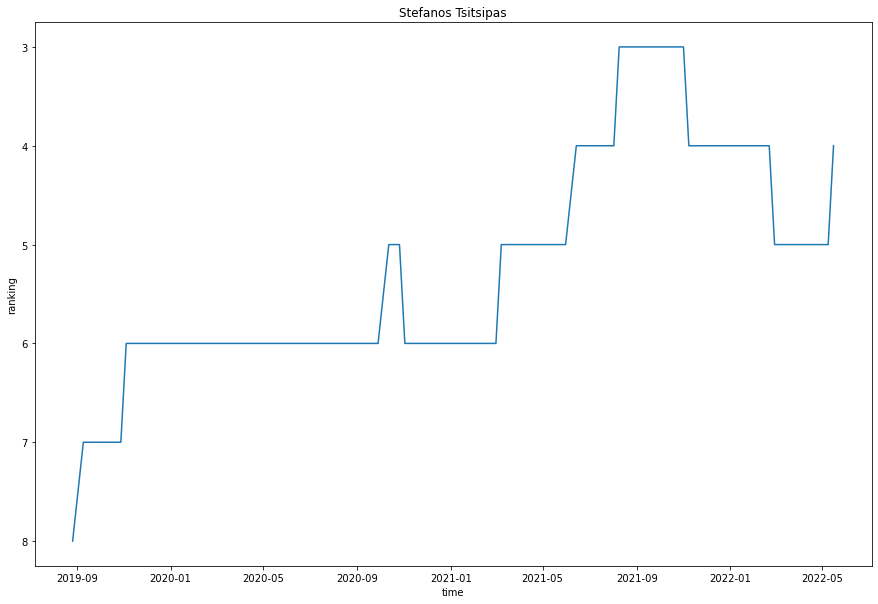

In [21]:
plt.figure(figsize=(15,10))
plt.plot(stitsipas_rankings_3y['date'],stitsipas_rankings_3y['ranking'])
plt.gca().invert_yaxis()
plt.title('Stefanos Tsitsipas')
plt.xlabel('time')
plt.ylabel('ranking')
plt.show()
None

# 4. Who’s the youngest player ever to reach the top 10?

In [23]:
youngest_df = rankings_df.copy()
youngest_df.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference
0,1,SRB,Novak Djokovic,34.0,8660,13,0,0,2022-05-16,98 days 13:10:08.077073
1,2,RUS,Daniil Medvedev,26.0,7980,21,0,0,2022-05-16,98 days 13:10:08.077073
2,3,GER,Alexander Zverev,25.0,7200,22,125,0,2022-05-16,98 days 13:10:08.077073
3,4,GRE,Stefanos Tsitsipas,23.0,6170,25,250,45,2022-05-16,98 days 13:10:08.077073
4,5,ESP,Rafael Nadal,35.0,5525,10,0,0,2022-05-16,98 days 13:10:08.077073


In [26]:
# we want only the top 10 so we filter for this
yrankings = youngest_df[(youngest_df["ranking"] <= 10)]
# now we filter for min age
yrankings = yrankings[(yrankings["age"] == min(yrankings["age"]))]
yrankings.head()

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference
318969,9,USA,Michael Chang,17.0,0,0,0,0,1990-02-19,11872 days 13:10:08.077073
319166,6,USA,Michael Chang,17.0,0,0,0,0,1990-02-12,11879 days 13:10:08.077073
319365,5,USA,Michael Chang,17.0,0,0,0,0,1990-02-05,11886 days 13:10:08.077073
319565,5,USA,Michael Chang,17.0,0,0,0,0,1990-01-29,11893 days 13:10:08.077073
319766,6,USA,Michael Chang,17.0,0,0,0,0,1990-01-22,11900 days 13:10:08.077073


In [28]:
# lets see if we have more than one player
yrankings2 = yrankings.groupby("player").agg({"date": "min", "age": "min"}).reset_index().sort_values("date")
yrankings2

,player,date,age
1,Bjorn Borg,1974-06-03,17.0
3,Mats Wilander,1982-07-12,17.0
0,Aaron Krickstein,1984-08-13,17.0
2,Boris Becker,1985-07-08,17.0
4,Michael Chang,1989-06-12,17.0


# 5. For how long has Roger Federer been in the top 5 consequently?

In [33]:
roger_df = rankings_df[(rankings_df['player']== 'Roger Federer') & (rankings_df['ranking']<=100)]
roger_df

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference
45,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-16,98 days 13:10:08.077073
245,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-09,105 days 13:10:08.077073
440,41,SUI,Roger Federer,40.0,1120,6,90,0,2022-05-02,112 days 13:10:08.077073
640,41,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-25,119 days 13:10:08.077073
841,42,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-18,126 days 13:10:08.077073
...,...,...,...,...,...,...,...,...,...,...
218065,66,SUI,Roger Federer,18.0,700,22,0,0,1999-10-25,8337 days 13:10:08.077073
218266,67,SUI,Roger Federer,18.0,683,21,0,0,1999-10-18,8344 days 13:10:08.077073
218492,93,SUI,Roger Federer,18.0,525,20,0,0,1999-10-11,8351 days 13:10:08.077073
218895,96,SUI,Roger Federer,18.0,510,20,0,0,1999-09-27,8365 days 13:10:08.077073


In [35]:
# we need a new column to counts the weeks difference
roger_df['weeks_diff'] = roger_df['date'] - roger_df['date'].shift()
roger_df

C:\Users\stama\AppData\Local\Temp/ipykernel_1788/1163053126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roger_df['weeks_diff'] = roger_df['date'] - roger_df['date'].shift()


,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference,weeks_diff
45,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-16,98 days 13:10:08.077073,NaT
245,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-09,105 days 13:10:08.077073,-7 days
440,41,SUI,Roger Federer,40.0,1120,6,90,0,2022-05-02,112 days 13:10:08.077073,-7 days
640,41,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-25,119 days 13:10:08.077073,-7 days
841,42,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-18,126 days 13:10:08.077073,-7 days
...,...,...,...,...,...,...,...,...,...,...,...
218065,66,SUI,Roger Federer,18.0,700,22,0,0,1999-10-25,8337 days 13:10:08.077073,-7 days
218266,67,SUI,Roger Federer,18.0,683,21,0,0,1999-10-18,8344 days 13:10:08.077073,-7 days
218492,93,SUI,Roger Federer,18.0,525,20,0,0,1999-10-11,8351 days 13:10:08.077073,-7 days
218895,96,SUI,Roger Federer,18.0,510,20,0,0,1999-09-27,8365 days 13:10:08.077073,-14 days


In [39]:
# now we create a new column to add the sum of the weeks
roger_df['cumsum'] = (roger_df['weeks_diff'] != roger_df['weeks_diff'].shift(1)).cumsum()
roger_df

C:\Users\stama\AppData\Local\Temp/ipykernel_1788/1210176969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roger_df['cumsum'] = (roger_df['weeks_diff'] != roger_df['weeks_diff'].shift(1)).cumsum()


,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference,weeks_diff,cumsum
45,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-16,98 days 13:10:08.077073,NaT,1
245,46,SUI,Roger Federer,40.0,1030,5,0,0,2022-05-09,105 days 13:10:08.077073,-7 days,2
440,41,SUI,Roger Federer,40.0,1120,6,90,0,2022-05-02,112 days 13:10:08.077073,-7 days,2
640,41,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-25,119 days 13:10:08.077073,-7 days,2
841,42,SUI,Roger Federer,40.0,1120,6,0,0,2022-04-18,126 days 13:10:08.077073,-7 days,2
...,...,...,...,...,...,...,...,...,...,...,...,...
218065,66,SUI,Roger Federer,18.0,700,22,0,0,1999-10-25,8337 days 13:10:08.077073,-7 days,116
218266,67,SUI,Roger Federer,18.0,683,21,0,0,1999-10-18,8344 days 13:10:08.077073,-7 days,116
218492,93,SUI,Roger Federer,18.0,525,20,0,0,1999-10-11,8351 days 13:10:08.077073,-7 days,116
218895,96,SUI,Roger Federer,18.0,510,20,0,0,1999-09-27,8365 days 13:10:08.077073,-14 days,117


In [37]:
roger_df['cumsum'].mode()

0    114
dtype: int32

In [38]:
roger_df[roger_df['cumsum'] == roger_df['cumsum'].mode().values[0]]

,ranking,country,player,age,points,tournaments,points_dropping,next_best,date,time_difference,weeks_diff,cumsum
101201,2,SUI,Roger Federer,29.0,9245,21,0,0,2011-01-10,4242 days 13:10:08.077073,-7 days,114
101401,2,SUI,Roger Federer,29.0,9145,21,0,0,2011-01-03,4249 days 13:10:08.077073,-7 days,114
101601,2,SUI,Roger Federer,29.0,9145,21,0,0,2010-12-27,4256 days 13:10:08.077073,-7 days,114
101801,2,SUI,Roger Federer,29.0,9145,21,0,0,2010-12-20,4263 days 13:10:08.077073,-7 days,114
102001,2,SUI,Roger Federer,29.0,9145,21,0,0,2010-12-13,4270 days 13:10:08.077073,-7 days,114
...,...,...,...,...,...,...,...,...,...,...,...,...
215266,67,SUI,Roger Federer,18.0,582,22,0,0,2000-02-07,8232 days 13:10:08.077073,-7 days,114
215460,61,SUI,Roger Federer,18.0,652,23,0,0,2000-01-31,8239 days 13:10:08.077073,-7 days,114
215661,62,SUI,Roger Federer,18.0,620,24,0,0,2000-01-24,8246 days 13:10:08.077073,-7 days,114
215861,62,SUI,Roger Federer,18.0,620,24,0,0,2000-01-17,8253 days 13:10:08.077073,-7 days,114


Roger Federer was in the top 5 for 413 week consequently! -- almost 8 years!!